# Regresion Lineal

Algunas caracteristicas de este algoritmo son:
+ Es un algoritmo supervisado por lo que necesita datos etiquetados o historicos
+ Relaciona las variables de entrada(variable predictora) con la salida de la siguiente forma:
    $$y_e = \alpha + \beta \cdot x$$
+ Para ajustar el modelo y hallar los parametros alfa y beta, utilizaremos un indice a minimizar que normalmente sera un error entre el valor real y el estimado
    $$e_i = (y_i - Y_e(x_i))$$
+ Para evitar que la sumatoria de estos errores se compense, se emplea el error cuadratico y en funcion del modelo predictivo este quedara dado por:
    $$min \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - Y_e(x_i))^2 = \sum_{i=1}^n (y_i - (\alpha + \beta \cdot x_i))^2$$
+ Empleando Calculo diferencial, podemos obtener que los parametros minimizados estan dados por:
    $$\beta = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$
    $$\alpha = \bar{y} + \beta \cdot \bar{x}$$

+ Debido a que hay muy pocos modelos realmente lineales se añade un componente de error o residuo $\epsilon$
$$y = \alpha + \beta \cdot x + \epsilon$$

+ Se asume que las distribucion de $\epsilon$ es normal, en caso contrario se puede asumir incorrecto emplear una regresion lineal

## Visualizacion de errores: Modelo con datos simulados
+ Se buscaran los parametros (a,b) de y = a + bx
+ X: 100 valores distribuidos por N(1.5, 2.5)
+ Ye1: 11 + 2.1*x + e
+ e: distribuido por N(0, 0.5)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos x
x = 1.5 + 2.5*np.random.randn(100)

In [8]:
# Datos y predichos
y_pred = 1.1 + 2.1*x

In [9]:
# Datos y reales
res = 1.9*np.random.randn(100)
y_actual = 1.1 + 2.1*x + res

In [10]:
data = pd.DataFrame({
    "x":x,
    "y_actual":y_actual,
    "y_pred":y_pred
})
data.head()

,x,y_actual,y_pred
0,3.136605,8.440922,7.686869
1,0.203248,1.008398,1.526822
2,0.679132,1.629045,2.526177
3,2.175014,7.229645,5.667530
4,-1.379610,-2.470662,-1.797181


In [11]:
y_mean = [np.mean(y_actual) for i in range(1, len(x) + 1)]

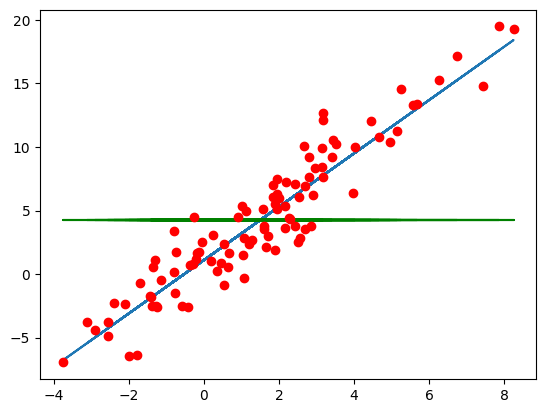

In [12]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_mean, color="Green")
plt.plot(x, y_actual, "ro")

+ Podemos observar en azul el valor real del modelo, en rojo el predicho y en verde el promedio
+ Existen 3 distancias relevantes:
    + SSD distancia de punto predicho y punto real, el cual no esta explicado por modelo y debe seguir una distribucion normal
    + SST distancia de punto predicho y promedio
    + SSR distancia de promedio y punto real, es el que se fija en el modelo
+ Para los que se debe cumplir que:
    + SST = SSR + SSD
+ De esto se deriva el estimador $R^2$, el cual es util para saber si un modelo es aceptable:
    + $R^2 = SSR/SST$
    + Se busca que sea cercano a 1, donde los errores no explicados de modelo sean 0

In [13]:
data["SSR"] = (data["y_pred"]-np.mean(y_actual))**2
data["SSD"] = (data["y_pred"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_actual))**2

In [14]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,3.136605,8.440922,7.686869,11.631678,0.568595,17.343701
1,0.203248,1.008398,1.526822,7.559877,0.268764,10.679480
2,0.679132,1.629045,2.526177,3.063089,0.804845,7.008195
3,2.175014,7.229645,5.667530,1.935397,2.440201,8.721979
4,-1.379610,-2.470662,-1.797181,36.887719,0.453576,45.522100


In [15]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])
print(f"SSR: {SSR} | SSD: {SSD} | SSR+SSD: {SSR+SSD} | SST: {SST}")

SSR: 2687.283872774421 | SSD: 365.4355098689892 | SSR+SSD: 3052.7193826434104 | SST: 3151.4879286723612


In [16]:
R2 = SSR/SST
R2

0.8527032099109143

Para obtener nuestros coeficientes de regresion hacemos
$$b = \frac{\sum(x_i - x_m)*(y_i-y_m)}{\sum(x_i-x_m)^2}$$
$$a = y_m - b \cdot x_m$$

In [17]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.470301164683911, 4.276344886296474)

In [18]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = ((data["x"]-x_mean)**2)

In [19]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d
0,3.136605,8.440922,7.686869,11.631678,0.568595,17.343701,6.939448,2.776567
1,0.203248,1.008398,1.526822,7.559877,0.268764,10.679480,4.140662,1.605423
2,0.679132,1.629045,2.526177,3.063089,0.804845,7.008195,2.094462,0.625949
3,2.175014,7.229645,5.667530,1.935397,2.440201,8.721979,2.081230,0.496621
4,-1.379610,-2.470662,-1.797181,36.887719,0.453576,45.522100,19.228370,8.121994


In [20]:
beta = sum(data["beta_n"])/sum(data["beta_d"]) # ojo son dos sumatorias n y d por eso se separa
alfa = y_mean - beta * x_mean
alfa, beta

(1.1310498317258793, 2.1392182296521396)

In [21]:
data["y_model"] = alfa + beta*data["x"]

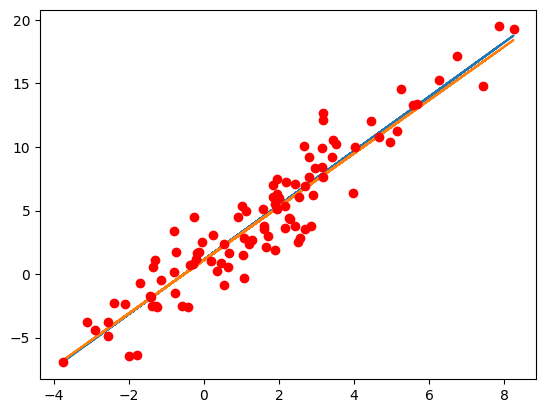

In [22]:
%matplotlib inline
plt.plot(x, data["y_model"])
plt.plot(x, data["y_pred"])
plt.plot(x, data["y_actual"], "ro")

In [23]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)
print(f"SSR: {SSR} | SSD: {SSD} | SSR+SSD: {SSR+SSD} | SST: {SST}")

SSR: 2787.7763742761563 | SSD: 363.7115543962065 | SSR+SSD: 3151.4879286723626 | SST: 3151.4879286723612


In [24]:
R2 = SSR/SST
R2

0.884590529099876

### Otros parametros estadisticos de evaluacion
#### EL p-valor
+ En casos de multiples variables X, nos gustaria conocer cuanto aporta cada una.
+ En el caso que $\beta$ sea muy cercano a 0 entonces solo $\alpha$ aportaria informacion y las variables no estarian correlacionadas
    + Un contraste de hipotesis posible seria 
    $$ 
    \begin{matrix}
    H_0: \beta = 0 \\
    H_1: \beta \neq 0
    \end{matrix}
    $$
    + Con el p-valor evaluamos, si p-valor es menor que el nivel de significacion se rechaza la hipotesis y aceptamos la relacion lineal

#### El estadistico F
+ Se emplea para evaluar si en el conjunto de variables aleatorias X hay almenos una significativa como predictora
+ Para comprobar la existencia de esta relacion, planteamos:
$$
\begin{matrix}
    H_0: \beta _1 = \beta _1 = ... = \beta _k = 0 \\
    H_1: \beta \neq 0, para~algun~i
\end{matrix}
$$
+ El estadistico F para comprobar esta hipotesis seria
$$
F = \frac{\frac{SSR}{p}}{\frac{SSD}{n-p-1}}
$$
    Donde
$$
n = N°~de~filas~de~dataset
$$
$$
p = N°~de~variables~predictoras
$$
$$
SST = \sum (y_i - \bar{y})^2, SSR=\sum(y(x_i)-\bar{y})^2, SSD = \sum (y_i - y(x_i))^2
$$
+ Dado el estadistico F obtenemos un p-valor el que se evalua respecto al nivel de significancia seleccionado para una distribucion de Fisher, si este es mas pequeño que el nivel de significancia la hipotesis se rechaza y existe algun $\beta _i$ que es representativo.

#### El error estandar residual (RSE)
+ Es la desviacion estandar el termino $\epsilon$
+ Para una regresion lineal simple:
$$
RSE = \sqrt \frac{\sum(y_i - y(x_i))^2}{n-2} = \sqrt\frac{SSD}{n-2}
$$
+ Para una regresion lineal multiple (p n° de variables predictoras):
$$
RSE = \sqrt\frac{SSD}{n-p-1}
$$
+ Podemos emplear esta desviacion tipica para comparar con el promedio de los valores reales y calcular un % de error respecto a la media como:
$$
\frac{RSE}{\bar{y}} \cdot 100\%
$$